In [1]:
import task_4_1 as data

In [2]:
# !pip install statsmodels

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import plotly.express as px
import pandas as pd
# import statsmodels.api as sm

In [4]:
def basis(params):
    '''
    params - сгенерированный набор параметров
    params_avg - среднее значение 
    '''
    params_avg = np.mean(params)
    return params_avg

In [6]:
N = 100

In [7]:
# Рассчитываем знание базового случая 
basic = data.STOIIP_det(basis(data.DATA['grv']), basis(data.DATA['phi']), basis(data.DATA['s_oil']),
                     basis(data.DATA['b_oil']),basis(data.DATA['ntg']))/1000000000
print (basic)

152.34741379182393


In [8]:
params = ['grv', 'phi', 's_oil', 'b_oil', 'ntg']
future_df = {}

In [ ]:
# Вариант с большим количеством ручной работы по написанию кода

# reserve_grv = [] #Создаем пустой список, в который будет добавлять значения запасов
# for i in range(N):
#     s_p = data.STOIIP_det(data.random_value(data.DATA['grv']), basis(data.DATA['phi']), basis(data.DATA['s_oil']),
#                      basis(data.DATA['b_oil']),basis(data.DATA['ntg']))
#     reserve_grv.append(s_p/1000000000)
# future_df['grv'] = [max(reserve_grv), min(reserve_grv)]

# reserve_phi = [] #Создаем пустой список, в который будет добавлять значения запасов
# for i in range(N):
#     s_p = data.STOIIP_det(basis(data.DATA['grv']), data.random_value(data.DATA['phi']), basis(data.DATA['s_oil']),
#                      basis(data.DATA['b_oil']),basis(data.DATA['ntg']))
#     reserve_phi.append(s_p/1000000000)
# future_df['phi'] = [max(reserve_phi), min(reserve_phi)]

# reserve_soil = [] #Создаем пустой список, в который будет добавлять значения запасов
# for i in range(N):
#     s_p = data.STOIIP_det(basis(data.DATA['grv']), basis(data.DATA['phi']), data.random_value(data.DATA['s_oil']),
#                      basis(data.DATA['b_oil']),basis(data.DATA['ntg']))
#     reserve_soil.append(s_p/1000000000)
# future_df['s_oil'] = [max(reserve_soil), min(reserve_soil)]

# reserve_boil = [] #Создаем пустой список, в который будет добавлять значения запасов
# for i in range(N):
#     s_p = data.STOIIP_det(basis(data.DATA['grv']), basis(data.DATA['phi']), basis(data.DATA['s_oil']),
#                     data.random_value(data.DATA['b_oil']),basis(data.DATA['ntg']))
#     reserve_boil.append(s_p/1000000000)
# future_df['b_oil'] = [max(reserve_boil), min(reserve_boil)]

# reserve_ntg = [] #Создаем пустой список, в который будет добавлять значения запасов
# for i in range(N):
#     s_p = data.STOIIP_det(basis(data.DATA['grv']), basis(data.DATA['phi']), basis(data.DATA['s_oil']),
#                      basis(data.DATA['b_oil']),data.random_value(data.DATA['ntg']))
#     reserve_ntg.append(s_p/1000000000)
# future_df['ntg'] = [max(reserve_ntg), min(reserve_ntg)]

# df = pd.DataFrame.from_dict(future_df).T
# df

In [44]:
#более автоматизированный вариант

f_df = {}
for i in range(len(params)):
    #заполняем список средними значениями для всех параметров, кроме того интервала, который соответствует интервалу,
    #в котором этот параметр будет генерироваться N раз
    array = np.zeros(N * len(params))
    for j in range(N * len(params)):
        if ((j < i * N) or (j >= i * N + N)):
            array[j] = basis(data.DATA[params[i]])
        else:
            array[j] = data.random_value(data.DATA[params[i]])

    f_df[params[i]] = array.tolist()

df_variables = pd.DataFrame.from_dict(f_df)


df_variables['s_p'] = data.STOIIP_det(df_variables['grv'],df_variables['phi'], df_variables['s_oil'], 
                                    df_variables['b_oil'], df_variables['ntg'])/1000000000
print(df_variables)

for i in range(N, N * len(params) + 100,100):
    future_df[params[int(i/N - 1)]] = [df_variables.s_p.iloc[i-N:i].max(), df_variables.s_p.iloc[i-N:i].min()]

              grv       phi     s_oil     b_oil       ntg         s_p
0    1.295403e+08  0.300386  0.747848  1.447596  0.830904  129.583924
1    1.607869e+08  0.300386  0.747848  1.447596  0.830904  160.841034
2    1.662595e+08  0.300386  0.747848  1.447596  0.830904  166.315422
3    1.596168e+08  0.300386  0.747848  1.447596  0.830904  159.670497
4    1.446730e+08  0.300386  0.747848  1.447596  0.830904  144.721680
..            ...       ...       ...       ...       ...         ...
495  1.522962e+08  0.300386  0.747848  1.447596  0.838366  153.715632
496  1.522962e+08  0.300386  0.747848  1.447596  0.843050  154.574502
497  1.522962e+08  0.300386  0.747848  1.447596  0.867522  159.061531
498  1.522962e+08  0.300386  0.747848  1.447596  0.888867  162.975121
499  1.522962e+08  0.300386  0.747848  1.447596  0.840100  154.033594

[500 rows x 6 columns]


In [45]:
df = pd.DataFrame.from_dict(future_df).T
df

,0,1
phi,232.832219,98.784748
s_oil,169.343097,133.066739
b_oil,168.885618,133.328593
ntg,166.478877,133.839147
grv,173.547139,129.583924


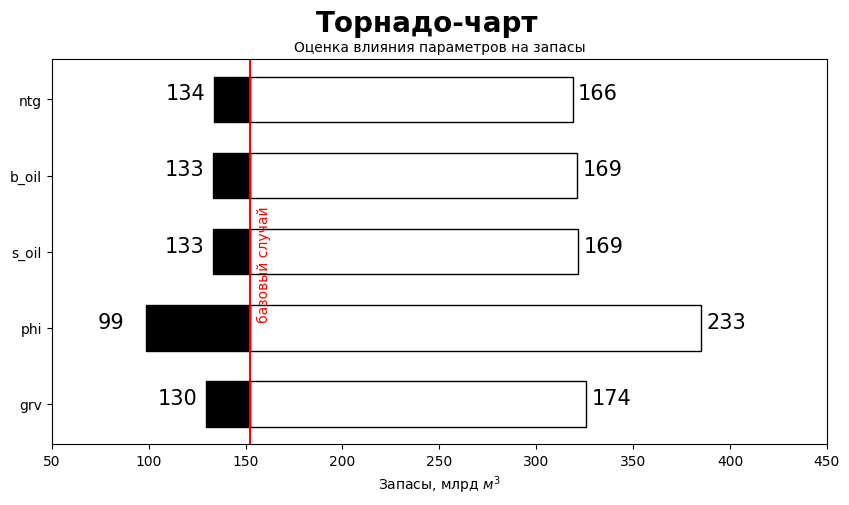

In [52]:
fig, ax = plt.subplots(figsize=(10, 5))
for i in range(len(params)):
    ax.barh(params[i], future_df[params[i]][0], left = basic, align='center', 
            height = 0.6,facecolor='white',edgecolor='black')
    ax.barh(params[i], basic-future_df[params[i]][1], left=future_df[params[i]][1], align='center', 
            height = 0.6,facecolor='black',edgecolor='black')
    
    ax.text(future_df[params[i]][0]+ 155, params[i],'{:,.0f}'.format(future_df[params[i]][0]), 
            size = 15,color = "black")
    ax.text(future_df[params[i]][1] - 25, params[i],'{:,.0f}'.format(future_df[params[i]][1]), 
            size = 15,color = "black")

plt.axvline(x=basic, color='r')
plt.figtext(0.33, 0.36, 'базовый случай', fontsize=10, rotation=90, color='r')
    
plt.xlim (50, 450)
plt.xlabel('Запасы, млрд $м^{3}$')
plt.suptitle('Торнадо-чарт',  fontsize = 20, weight="bold")
plt.title("Оценка влияния параметров на запасы", fontsize = 10);